<a href="https://www.kaggle.com/code/salmamamdoh/eda-and-processing?scriptVersionId=184656420" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

# **Fist Step Exploratory Data Analysis (EDA )**


### 1. Data Inspection


In [2]:
df = pd.read_csv('/kaggle/input/amazon-sale-report/Amazon Sale Report.csv', encoding='ISO-8859-1' , low_memory=False)

In [3]:
df.shape

(128977, 24)

In [4]:
# Inspect the first few rows
df.head()

index             Order ID      Date                        Status  \
0    0.0  405-8078784-5731545  04-30-22                     Cancelled   
1    1.0  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2    2.0  404-0687676-7273146  04-30-22                       Shipped   
3    3.0  403-9615377-8133951  04-30-22                     Cancelled   
4    4.0  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Set  ...      INR  647.62       MUMBAI  MAHARASHTRA   
1          kurta  ...      INR  406.00    BENGALURU    KARNATAKA   
2          kurta  ...      INR  329.00  NAVI MUMBAI  MAHARASHTRA   
3  Western Dress  ...      INR  753.33   PUDUCHERRY   PUDUCHERRY   
4            Top  ...      INR  574.00      CHENNAI   TAMIL NADU   

  ship-postal-code  ship-country  \
0         400081.0            IN   
1         560085.0            IN   
2         410210.0            IN   
3         605008.0            IN   
4         600073.0            IN   

                                       promotion-ids    B2B  fulfilled-by  \
0                                                NaN  False     Easy Ship   
1  Amazon PLCC Free-Financing Universal Merchant ...  False     Easy Ship   
2       IN Core Free Shipping 2015/04/08 23-48-5-108   True           NaN   
3                                                NaN  False     Easy Ship   
4                                                NaN  False           NaN   

  Unnamed: 22  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 24 columns]

In [5]:
# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128977 entries, 0 to 128976
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  float64
 1   Order ID            128977 non-null  object 
 2   Date                128977 non-null  object 
 3   Status              128977 non-null  object 
 4   Fulfilment          128977 non-null  object 
 5   Sales Channel       128977 non-null  object 
 6   ship-service-level  128977 non-null  object 
 7   Style               128977 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  float64
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [6]:
df.describe(include='all')

index             Order ID      Date   Status Fulfilment  \
count   128975.000000               128977    128977   128977     128977   
unique            NaN               120379        92       14          4   
top               NaN  171-5057375-2831560  05-03-22  Shipped     Amazon   
freq              NaN                   12      2085    77804      89698   
mean     64487.000000                  NaN       NaN      NaN        NaN   
std      37232.019822                  NaN       NaN      NaN        NaN   
min          0.000000                  NaN       NaN      NaN        NaN   
25%      32243.500000                  NaN       NaN      NaN        NaN   
50%      64487.000000                  NaN       NaN      NaN        NaN   
75%      96730.500000                  NaN       NaN      NaN        NaN   
max     128974.000000                  NaN       NaN      NaN        NaN   

       Sales Channel  ship-service-level    Style           SKU Category  ...  \
count          128977             128977   128977        128975   128975  ...   
unique              3                  3     1378          7195        9  ...   
top         Amazon.in          Expedited  JNE3797  JNE3797-KR-L      Set  ...   
freq           128851              88615     4224           773    50284  ...   
mean              NaN                NaN      NaN           NaN      NaN  ...   
std               NaN                NaN      NaN           NaN      NaN  ...   
min               NaN                NaN      NaN           NaN      NaN  ...   
25%               NaN                NaN      NaN           NaN      NaN  ...   
50%               NaN                NaN      NaN           NaN      NaN  ...   
75%               NaN                NaN      NaN           NaN      NaN  ...   
max               NaN                NaN      NaN           NaN      NaN  ...   

       currency         Amount  ship-city   ship-state ship-postal-code  \
count    121180  121180.000000     128942       128940    128940.000000   
unique        1            NaN       8955           69              NaN   
top         INR            NaN  BENGALURU  MAHARASHTRA              NaN   
freq     121180            NaN      11217        22260              NaN   
mean        NaN     648.561465        NaN          NaN    463969.927594   
std         NaN     281.211687        NaN          NaN    191475.956294   
min         NaN       0.000000        NaN          NaN    110001.000000   
25%         NaN     449.000000        NaN          NaN    382421.000000   
50%         NaN     605.000000        NaN          NaN    500033.000000   
75%         NaN     788.000000        NaN          NaN    600024.000000   
max         NaN    5584.000000        NaN          NaN    989898.000000   

        ship-country                                 promotion-ids     B2B  \
count         128940                                         79820  128973   
unique             1                                          5787       2   
top               IN  IN Core Free Shipping 2015/04/08 23-48-5-108   False   
freq          128940                                         46100  128102   
mean             NaN                                           NaN     NaN   
std              NaN                                           NaN     NaN   
min              NaN                                           NaN     NaN   
25%              NaN                                           NaN     NaN   
50%              NaN                                           NaN     NaN   
75%              NaN                                           NaN     NaN   
max              NaN                                           NaN     NaN   

        fulfilled-by Unnamed: 22  
count          39275       79923  
unique             1           1  
top        Easy Ship       False  
freq           39275       79923  
mean             NaN         NaN  
std              NaN         NaN  
min              NaN         NaN  
25%         

In [7]:
# Assess the number of missing values in each column.
df.isnull().sum()

index                     2
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       2
Category                  2
Size                      2
ASIN                      2
Courier Status         6874
Qty                       2
currency               7797
Amount                 7797
ship-city                35
ship-state               37
ship-postal-code         37
ship-country             37
promotion-ids         49157
B2B                       4
fulfilled-by          89702
Unnamed: 22           49054
dtype: int64

In [8]:
# Drop unnecessary columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [9]:
df.head()

index             Order ID      Date                        Status  \
0    0.0  405-8078784-5731545  04-30-22                     Cancelled   
1    1.0  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2    2.0  404-0687676-7273146  04-30-22                       Shipped   
3    3.0  403-9615377-8133951  04-30-22                     Cancelled   
4    4.0  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ...  Qty currency  Amount    ship-city   ship-state  \
0            Set  ...  0.0      INR  647.62       MUMBAI  MAHARASHTRA   
1          kurta  ...  1.0      INR  406.00    BENGALURU    KARNATAKA   
2          kurta  ...  1.0      INR  329.00  NAVI MUMBAI  MAHARASHTRA   
3  Western Dress  ...  0.0      INR  753.33   PUDUCHERRY   PUDUCHERRY   
4            Top  ...  1.0      INR  574.00      CHENNAI   TAMIL NADU   

   ship-postal-code ship-country  \
0          400081.0           IN   
1          560085.0           IN   
2          410210.0           IN   
3          605008.0           IN   
4          600073.0           IN   

                                       promotion-ids    B2B fulfilled-by  
0                                                NaN  False    Easy Ship  
1  Amazon PLCC Free-Financing Universal Merchant ...  False    Easy Ship  
2       IN Core Free Shipping 2015/04/08 23-48-5-108   True          NaN  
3                                                NaN  False    Easy Ship  
4                                                NaN  False          NaN  

[5 rows x 23 columns]

### 1. Summary Statistics


In [10]:
# Generate the report
profile = ProfileReport(df, title="YData Profiling Report")

# To display the report in a Jupyter notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Summary Statistics will be completed after data processing phase¶


# **Second Step Data Preprocessing**


### 1. Data Type Conversions


In [11]:
# Define the date format
date_format = '%m-%d-%y'

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format=date_format, errors='coerce')

In [12]:
# Convert 'index', 'Qty', 'Amount', 'ship-postal-code' to numeric types
df['df_index'] = pd.to_numeric(df['df_index'], errors='coerce')
df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['ship-postal-code'] = pd.to_numeric(df['ship-postal-code'], errors='coerce')

In [13]:
print(df.columns)

Index(['df_index', 'Order ID', 'Date', 'Status', 'Fulfilment',
       'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category',
       'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'ship-country',
       'promotion-ids', 'B2B', 'fulfilled-by'],
      dtype='object')


In [14]:
df.rename(columns={'Sales Channel ': 'Sales Channel'}, inplace=True)

In [15]:
# Corrected list of categorical columns based on the actual DataFrame columns
categorical_cols = [
    'Order ID', 'Status', 'Fulfilment','Sales Channel', 
    'ship-service-level', 'Style', 'SKU', 'Category', 
    'Size', 'ASIN', 'Courier Status', 'currency', 
    'ship-city', 'ship-state', 'ship-country', 
    'promotion-ids', 'B2B', 'fulfilled-by'
]

# Make sure the column names match exactly with those in your DataFrame
categorical_cols = [col for col in categorical_cols if col in df.columns]

# Convert categorical columns to 'category' type
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [16]:
# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128977 entries, 0 to 128976
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   df_index            128975 non-null  float64       
 1   Order ID            128977 non-null  category      
 2   Date                128975 non-null  datetime64[ns]
 3   Status              128977 non-null  category      
 4   Fulfilment          128977 non-null  category      
 5   Sales Channel       128977 non-null  category      
 6   ship-service-level  128977 non-null  category      
 7   Style               128977 non-null  category      
 8   SKU                 128975 non-null  category      
 9   Category            128975 non-null  category      
 10  Size                128975 non-null  category      
 11  ASIN                128975 non-null  category      
 12  Courier Status      122103 non-null  category      
 13  Qty                 128975 no

### 2. Handling Missing Values

In [17]:
# Add new categories to categorical columns with missing values
new_categories = {
    'Courier Status': 'Unknown', 
    'currency': 'Unknown', 
    'ship-city': 'Unknown', 
    'ship-state': 'Unknown', 
    'ship-country': 'Unknown', 
    'promotion-ids': 'None', 
    'B2B': 'Unknown', 
    'fulfilled-by': 'Unknown',
}

for col, new_cat in new_categories.items():
    if col in df.columns:
        df[col] = df[col].cat.add_categories(new_cat)

In [18]:
df.fillna({
    'Courier Status': 'Unknown', 
    'currency': 'Unknown', 
    'Amount': 0, 
    'ship-city': 'Unknown', 
    'ship-state': 'Unknown', 
    'ship-postal-code': 0, 
    'ship-country': 'Unknown', 
    'promotion-ids': 'None', 
    'B2B': 'Unknown', 
    'fulfilled-by': 'Unknown'
}, inplace=True)

In [19]:
# Drop rows with missing 'df_index' and 'Date' values
df.dropna(subset=['df_index', 'Date'], inplace=True)

In [20]:
df.isnull().sum()

df_index              0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
dtype: int64

In [21]:
df.head()

df_index             Order ID       Date                        Status  \
0       0.0  405-8078784-5731545 2022-04-30                     Cancelled   
1       1.0  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2       2.0  404-0687676-7273146 2022-04-30                       Shipped   
3       3.0  403-9615377-8133951 2022-04-30                     Cancelled   
4       4.0  407-1069790-7240320 2022-04-30                       Shipped   

  Fulfilment Sales Channel ship-service-level    Style              SKU  \
0   Merchant     Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant     Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon     Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant     Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon     Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ...  Qty currency  Amount    ship-city   ship-state  \
0            Set  ...  0.0      INR  647.62       MUMBAI  MAHARASHTRA   
1          kurta  ...  1.0      INR  406.00    BENGALURU    KARNATAKA   
2          kurta  ...  1.0      INR  329.00  NAVI MUMBAI  MAHARASHTRA   
3  Western Dress  ...  0.0      INR  753.33   PUDUCHERRY   PUDUCHERRY   
4            Top  ...  1.0      INR  574.00      CHENNAI   TAMIL NADU   

   ship-postal-code ship-country  \
0          400081.0           IN   
1          560085.0           IN   
2          410210.0           IN   
3          605008.0           IN   
4          600073.0           IN   

                                       promotion-ids    B2B fulfilled-by  
0                                               None  False    Easy Ship  
1  Amazon PLCC Free-Financing Universal Merchant ...  False    Easy Ship  
2       IN Core Free Shipping 2015/04/08 23-48-5-108   True      Unknown  
3                                               None  False    Easy Ship  
4                                               None  False      Unknown  

[5 rows x 23 columns]

### 3. Outlier Detection and Treatment


In [22]:
df_describe = df.describe()
df_describe

df_index                           Date            Qty  \
count  128975.000000                         128975  128975.000000   
mean    64487.000000  2022-05-12 11:49:27.951928576       0.904431   
min         0.000000            2022-03-31 00:00:00       0.000000   
25%     32243.500000            2022-04-20 00:00:00       1.000000   
50%     64487.000000            2022-05-10 00:00:00       1.000000   
75%     96730.500000            2022-06-04 00:00:00       1.000000   
max    128974.000000            2022-06-29 00:00:00      15.000000   
std     37232.019822                            NaN       0.313354   

              Amount  ship-postal-code  
count  128975.000000     128975.000000  
mean      609.363662     463844.019880  
min         0.000000          0.000000  
25%       413.000000     382421.000000  
50%       583.000000     500033.000000  
75%       771.000000     600024.000000  
max      5584.000000     989898.000000  
std       313.347147     191602.438632

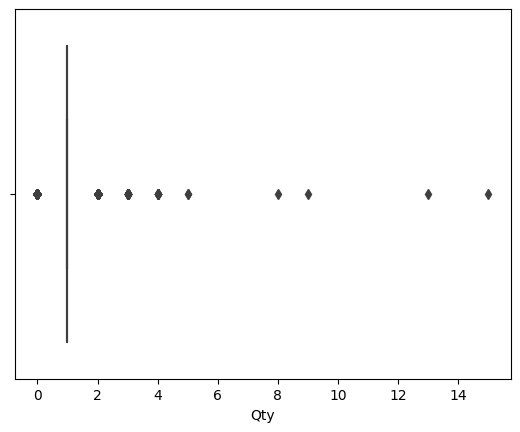

In [23]:
sns.boxplot(x=df['Qty'])
plt.show()

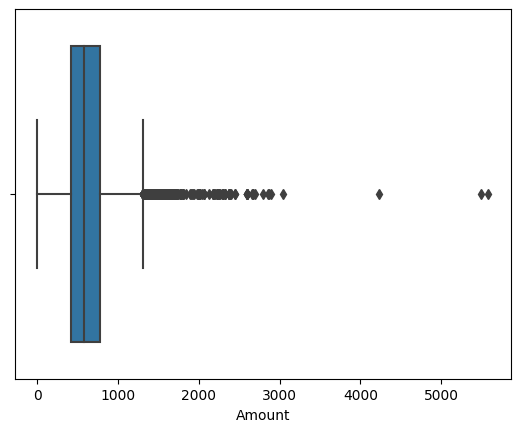

In [24]:
sns.boxplot(x=df['Amount'])
plt.show()

In [25]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_qty = df['Qty'].quantile(0.25)
Q3_qty = df['Qty'].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty

Q1_amount = df['Amount'].quantile(0.25)
Q3_amount = df['Amount'].quantile(0.75)
IQR_amount = Q3_amount - Q1_amount

# Define lower and upper bounds for outliers
lower_bound_qty = Q1_qty - 1.5 * IQR_qty
upper_bound_qty = Q3_qty + 1.5 * IQR_qty

lower_bound_amount = Q1_amount - 1.5 * IQR_amount
upper_bound_amount = Q3_amount + 1.5 * IQR_amount

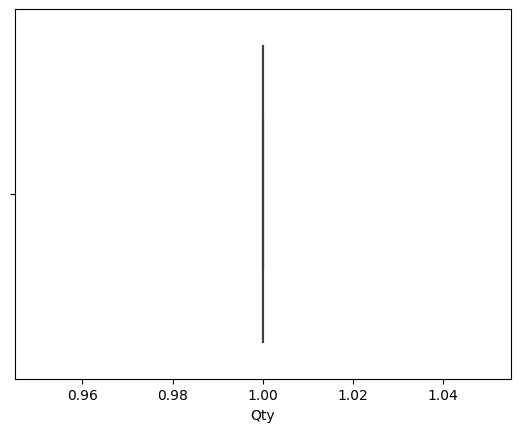

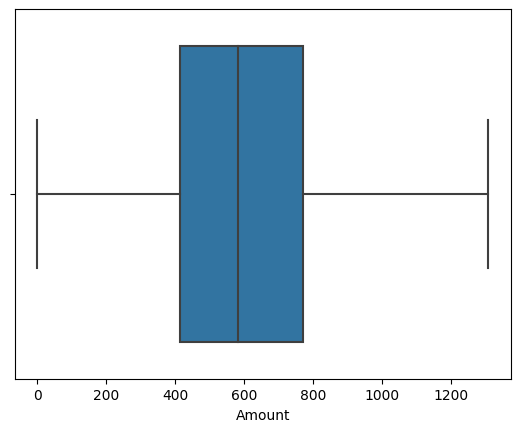

In [26]:
# Cap values for 'Qty'
df['Qty'] = np.where(df['Qty'] > upper_bound_qty, upper_bound_qty, df['Qty'])
df['Qty'] = np.where(df['Qty'] < lower_bound_qty, lower_bound_qty, df['Qty'])

# Cap values for 'Amount'
df['Amount'] = np.where(df['Amount'] > upper_bound_amount, upper_bound_amount, df['Amount'])
df['Amount'] = np.where(df['Amount'] < lower_bound_amount, lower_bound_amount, df['Amount'])

# Plot again
sns.boxplot(x=df['Qty'])
plt.show()

sns.boxplot(x=df['Amount'])
plt.show()

### Continue Statistical Statistics


In [27]:
# Summary Statistics
df.describe(include='all')

df_index             Order ID                           Date  \
count   128975.000000               128975                         128975   
unique            NaN               120378                            NaN   
top               NaN  171-5057375-2831560                            NaN   
freq              NaN                   12                            NaN   
mean     64487.000000                  NaN  2022-05-12 11:49:27.951928576   
min          0.000000                  NaN            2022-03-31 00:00:00   
25%      32243.500000                  NaN            2022-04-20 00:00:00   
50%      64487.000000                  NaN            2022-05-10 00:00:00   
75%      96730.500000                  NaN            2022-06-04 00:00:00   
max     128974.000000                  NaN            2022-06-29 00:00:00   
std      37232.019822                  NaN                            NaN   

         Status Fulfilment Sales Channel ship-service-level    Style  \
count    128975     128975        128975             128975   128975   
unique       13          2             2                  2     1377   
top     Shipped     Amazon     Amazon.in          Expedited  JNE3797   
freq      77804      89698        128851              88615     4224   
mean        NaN        NaN           NaN                NaN      NaN   
min         NaN        NaN           NaN                NaN      NaN   
25%         NaN        NaN           NaN                NaN      NaN   
50%         NaN        NaN           NaN                NaN      NaN   
75%         NaN        NaN           NaN                NaN      NaN   
max         NaN        NaN           NaN                NaN      NaN   
std         NaN        NaN           NaN                NaN      NaN   

                 SKU Category  ...       Qty currency         Amount  \
count         128975   128975  ...  128975.0   128975  128975.000000   
unique          7195        9  ...       NaN        2            NaN   
top     JNE3797-KR-L      Set  ...       NaN      INR            NaN   
freq             773    50284  ...       NaN   121180            NaN   
mean             NaN      NaN  ...       1.0      NaN     605.773713   
min              NaN      NaN  ...       1.0      NaN       0.000000   
25%              NaN      NaN  ...       1.0      NaN     413.000000   
50%              NaN      NaN  ...       1.0      NaN     583.000000   
75%              NaN      NaN  ...       1.0      NaN     771.000000   
max              NaN      NaN  ...       1.0      NaN    1308.000000   
std              NaN      NaN  ...       0.0      NaN     302.792392   

        ship-city   ship-state  ship-postal-code ship-country promotion-ids  \
count      128975       128975     128975.000000       128975        128975   
unique       8956           70               NaN            2          5788   
top     BENGALURU  MAHARASHTRA               NaN           IN          None   
freq        11217        22260               NaN       128940         49155   
mean          NaN          NaN     463844.019880          NaN           NaN   
min           NaN          NaN          0.000000          NaN           NaN   
25%           NaN          NaN     382421.000000          NaN           NaN   
50%           NaN          NaN     500033.000000          NaN           NaN   
75%           NaN          NaN     600024.000000          NaN           NaN   
max           NaN          NaN     989898.000000          NaN           NaN   
std           NaN          NaN     191602.438632          NaN           NaN   

           B2B fulfilled-by  
count   128975       128975  
unique       3            2  
top      False      Unknown  
freq    128102        89700  
mean       NaN          NaN  
min        NaN          NaN  
25%        NaN          NaN  
50%        NaN          NaN  
75%        NaN          NaN  
max        NaN          NaN  
std        NaN          NaN  

[11 rows x 23 columns]

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


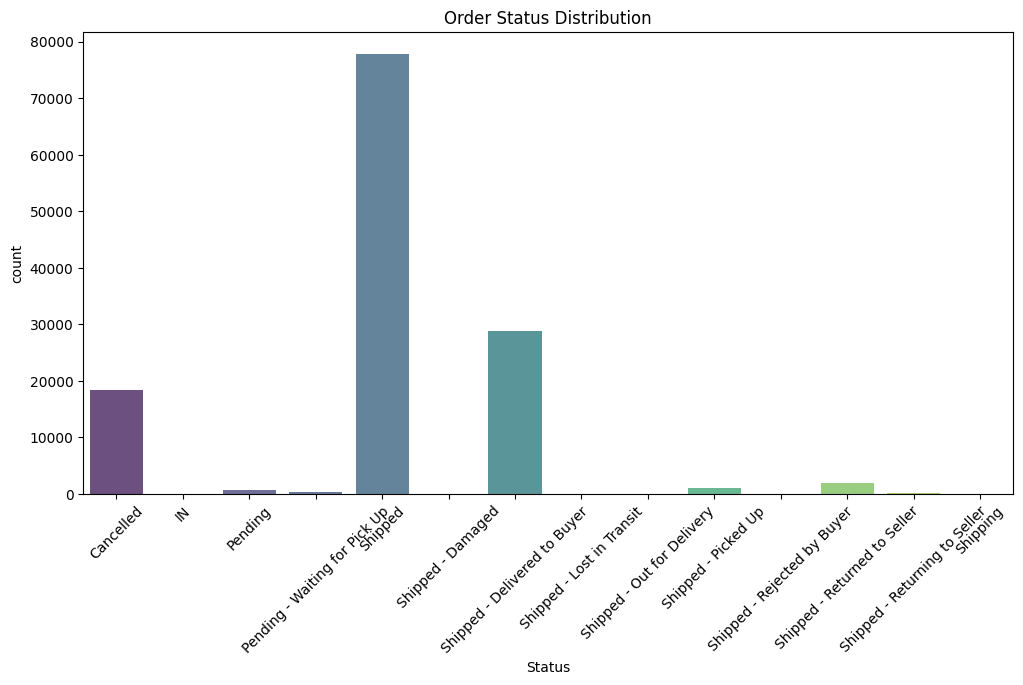

In [28]:
# Order Status Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Status', palette='viridis', alpha=0.8)
plt.title('Order Status Distribution')
plt.xticks(rotation=45)
plt.show()

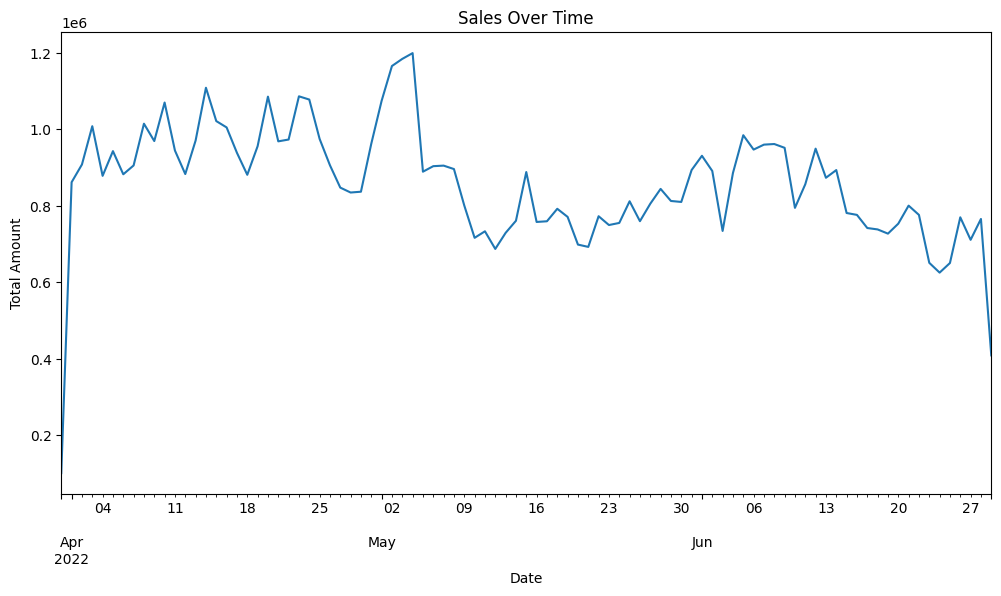

In [29]:
plt.figure(figsize=(12, 6))
df.groupby('Date')['Amount'].sum().plot()
plt.title('Sales Over Time')
plt.ylabel('Total Amount')
plt.show()

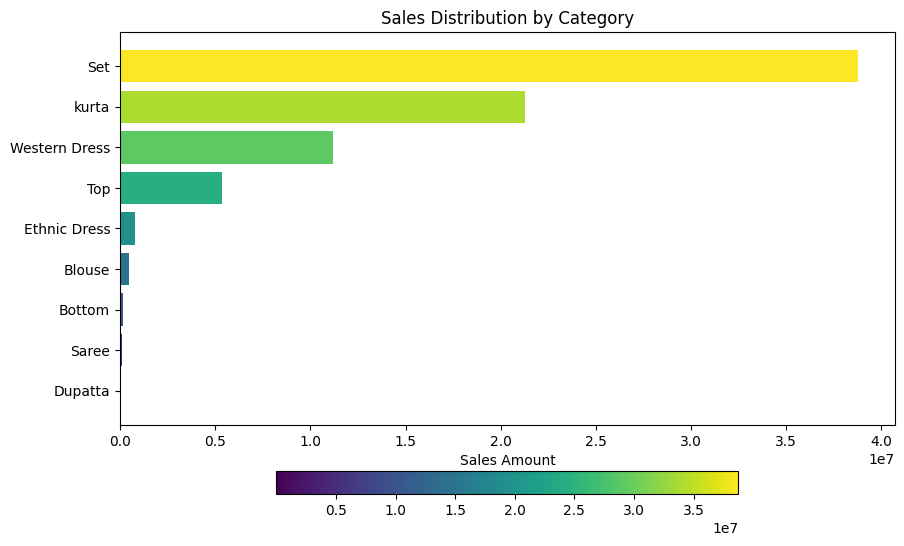

In [30]:
# Calculate total sales amount for each category
category_sales = df.groupby('Category', observed=False)['Amount'].sum().sort_values()

# Plotting the bar chart with custom colors
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axes explicitly

# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(category_sales)))
bars = ax.barh(category_sales.index, category_sales.values, color=colors)

# Add labels and title
ax.set_xlabel('Sales Amount')
ax.set_title('Sales Distribution by Category')

# Create a ScalarMappable for color mapping
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(category_sales.values), vmax=max(category_sales.values)))
sm.set_array([])  # Fake an empty array for the ScalarMappable
fig.colorbar(sm, orientation='horizontal', fraction=0.05, pad=0.1, ax=ax)  # Add colorbar to the figure

plt.show()

In [31]:
# Save DataFrame to CSV file
df.to_csv('Amazon_Processed_data.csv', index=False)